# Lake chemistry data: Exploratory analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import jupyter_black

jupyter_black.load()

## Load and inspect the data set

In [3]:
df_lake_chem = pd.read_excel(
    "data/LakeChem 2001-2022 Surface Season cleand.xlsx", 
    sheet_name="LakeChem 2001-2022 Surface Seas",
)

In [7]:
df_lake_chem.head()

,MD-MVM Id,Nationellt övervakningsstations-ID,Övervakningsstation,Stationskoordinat N/X,Stationskoordinat E/Y,Län,Kommun,MS_CD C3,ProvId,Provdatum,...,Tot-P (µg/l P),Si (mg/l),Fe (µg/l),Al (µg/l),Al_s (µg/l),Syrgashalt (mg/l O2),Siktdjup (m),Siktdjup med kikare (m),Siktdjup utan kikare (m),Vattentemperatur (°C)
0,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22480,2001-03-28,...,8.0,2.27,40.0,NaN,85.0,NaN,5.5,NaN,NaN,0.6
1,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22481,2001-05-21,...,5.0,1.62,43.0,NaN,80.0,NaN,7.6,NaN,NaN,10.2
2,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22482,2001-08-22,...,5.0,1.73,19.0,NaN,45.0,NaN,6.0,NaN,NaN,18.6
3,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22483,2001-10-15,...,8.0,1.72,41.0,NaN,50.0,NaN,7.0,NaN,NaN,10.3
4,54,262403.0,Spjutsjön,6722638,524356,Dalarnas län,Falun,WA42559716,22484,2002-02-26,...,8.0,1.89,36.0,NaN,55.0,NaN,NaN,NaN,NaN,1.5


In [12]:
df_lake_chem.shape

(8974, 52)

In [10]:
df_lake_chem.isnull().sum()

MD-MVM Id                                0
Nationellt övervakningsstations-ID     161
Övervakningsstation                      0
Stationskoordinat N/X                    0
Stationskoordinat E/Y                    0
Län                                      0
Kommun                                   0
MS_CD C3                               227
ProvId                                   0
Provdatum                                0
Provtagningsår                           0
Provtagningsmånad                        0
Provtagningsdag                          0
SeasonType                               0
Season                                   0
Season priority                          0
Season cleaning                          0
Max provdjup (m)                         1
TOC (mg/l C)                             0
DOC (mg/l C)                          8553
Tot-N_ps (µg/l N)                     6607
Tot-N_TNb (µg/l N)                    2375
Abs_F 254 (/5cm)                      4921
Abs_F 365 (

### Initial hypothesis on most important variables

Dependent: TOC (mg/l C); Abs_F 420 (/5cm)

Explanatory / control: SO4 (mekv/l) (sulfate); NH4-N (µg/l N) (ammonium); NO2+NO3-N (µg/l N) (nitrate, nitrite); PO4-P (µg/l P) (phosphate); Tot-P (µg/l P) (total phosphorus); Fe (µg/l) (iron); Siktdjup (m)

**--> Good data availability of all key variables except Siktdjup**

## Time series plots of different variables

In [15]:
list_of_lakes = df_lake_chem["Övervakningsstation"].unique().tolist()
print(list_of_lakes)

['Spjutsjön', 'Edasjön', 'Mäsen', 'Hällsjön', 'Gipsjön', 'Översjön', 'Remmarsjön', 'Hällvattnet', 'Siggeforasjön', 'Bäen', 'Valkeajärvi', 'Valasjön', 'Skärsjön', 'Latnjajaure', 'Sännen', 'Svinarydsjön', 'Örsjön', 'Harasjön', 'Svartesjön', 'Stora Skärsjön', 'Fyrsjön', 'Älgarydssjön', 'Björken', 'Älgsjön', 'Rammsjön', 'Lilla Öresjön', 'Överudssjön', 'N. Yngern', 'Stora Envättern', 'Hjärtsjön', 'Fiolen', 'Storasjö', 'Ulvsjön', 'Bysjön', 'Dagarn', 'Övre Skärsjön', 'Hinnasjön', 'Limmingsjön', 'Granvattnet', 'Rotehogstjärnen', 'Hökesjön', 'Allgjuttern', 'Bergträsket', 'Brunnsjön', 'Tomeshultagölen', 'Stora Tresticklan', 'Brännträsket', 'St. Lummersjön', 'Vuolgamjaure', 'Stor-Arasjön', 'Öjsjön', 'Njalakjaure', 'Täftesträsket', 'Stora Gryten', 'Skärgölen', 'Grissjön', 'Alsjön', 'Degervattnet', 'Humsjön', 'Stor-Björsjön', 'Sangen', 'Stor-Backsjön', 'Västra Solsjön', 'Fräcksjön', 'Tärnan', 'Tängersjö', 'Fjärasjö', 'Louvvajaure', 'Jutsajaure', 'Övre Fjätsjön', 'Pahajärvi', 'Tväringen', 'Sidensjön

In [1]:
len(list_of_lakes)

NameError: name 'list_of_lakes' is not defined

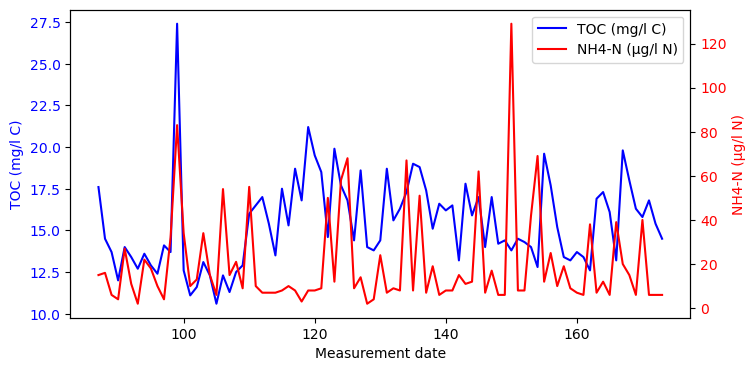

In [33]:
# Select what lake and variables to study
lake = "Edasjön"
dependent_var = "TOC (mg/l C)"
explan_var = "NH4-N (µg/l N)"

data_for_plot = df_lake_chem.loc[df_lake_chem["Övervakningsstation"] == lake] 

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot the first variable on the left y-axis
ax1.plot(data_for_plot.index, data_for_plot[dependent_var], color='b', label=dependent_var)
ax1.set_xlabel("Measurement date")
ax1.set_ylabel(dependent_var, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis and plot the second variable on it
ax2 = ax1.twinx()
ax2.plot(data_for_plot.index, data_for_plot[explan_var], color='r', label=explan_var)
ax2.set_ylabel(explan_var, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.show()